In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from scipy.interpolate import spline
from matplotlib.ticker import LinearLocator, FormatStrFormatter

C5.1 Distribution of P(La|D) -- Both_reset
----------

In [8]:
def smooth(matrix, ratio=20):
    '''
        Smooth the matrix according colums
    '''
    new_matrix = np.zeros(matrix.shape)
    for i in range(matrix.shape[1]):
        tmp = 0
        for j in range(matrix.shape[0]):
            tmp = (1-1/ratio)*tmp + 1/ratio*matrix[j,i]
            new_matrix[j,i] = tmp
    return new_matrix

In [116]:
path = 'exp_results/'
PDF = 'comp_generations.npy'
NONE_RST = 'test_none_reset/'
LIST_RST = 'test_only_listener_reset/'
SPKE_RST = 'test_only_speaker_reset/'
BOTH_RST = 'test_both_spk_and_lis/'
BINS = 10
PDF_both_spk_and_lis = np.load(path+BOTH_RST+PDF)

In [117]:
histo_list = []
for comp_list in PDF_both_spk_and_lis:
    tmp_histo = np.histogram(comp_list, bins=BINS)[0]
    histo_list.append(tmp_histo)
    
histo_matrix = np.asarray(histo_list)
histo_matrix = smooth(histo_matrix,20) # Smooth across generations

X = np.arange(0,BINS,1)*0.1
X_NEW = np.linspace(min(X),max(X),20)

smoth_matrix=[]
for gen in range(histo_matrix.shape[0]):   # Smooth for each generation
    tmp_line = histo_matrix[gen,:]
    smoth_line = spline(X,tmp_line,X_NEW)
    smoth_line = smoth_line/smoth_line.sum()
    smoth_matrix.append(smoth_line)

smoth_matrix = np.asarray(smoth_matrix)

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:15: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
  from ipykernel import kernelapp as app


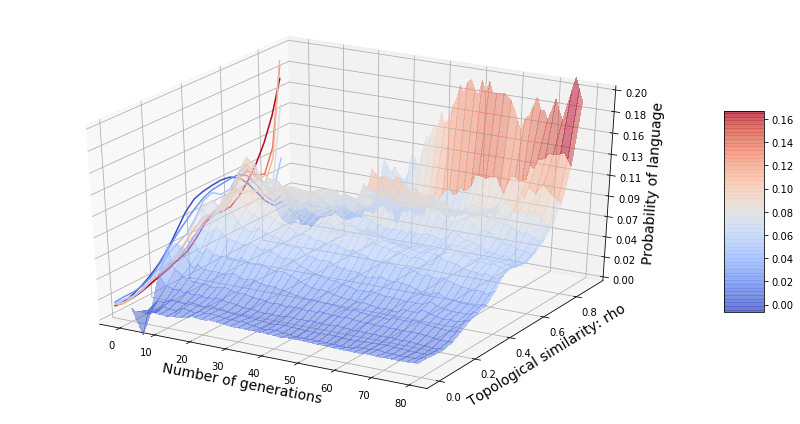

In [145]:
fig = plt.figure(figsize=(12,6))
ax = fig.gca(projection='3d')

Y = np.arange(0,80,1)
X_G, Y_G = np.meshgrid(X_NEW, Y)
Z = smoth_matrix
surf = ax.plot_surface(Y_G,X_G,Z,cmap=cm.coolwarm,linewidth=1,antialiased=False, alpha=0.5)
#cset = ax.contour(Y_G,X_G,Z,zdir='z',offset = 0, cmap=cm.coolwarm)
cset = ax.contour(Y_G,X_G,Z,zdir='x',offset = -5, cmap=cm.coolwarm)
ax.set_zlim(0,0.2)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

ax.set_xlabel('Number of generations',fontsize=14)
ax.set_ylabel('Topological similarity: rho',fontsize=14)
ax.set_zlabel('Probability of language',fontsize=14)

fig.colorbar(surf,shrink=0.5,aspect=5)
#ax.view_init(elev=90,azim=270)

fig.tight_layout()
fig.savefig('Figures/Both_reset_3D.pdf')

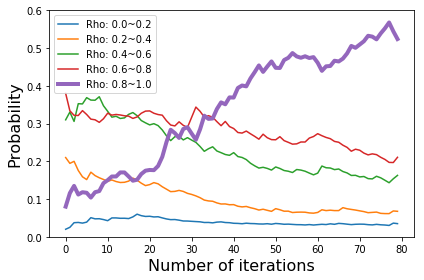

In [152]:
fig2 = plt.figure(figsize=(6,4))
ax2 = fig2.add_subplot(1,1,1)

BINS_2 = 5
histo_list2 = []
for comp_list in PDF_both_spk_and_lis:
    tmp_histo2 = np.histogram(comp_list, bins=BINS_2)[0]
    histo_list2.append(tmp_histo2)

histo_matrix2 = np.asarray(histo_list2)
smoth_matrix2 = smooth(histo_matrix2,20)

for i in range(smoth_matrix2.shape[0]):
    tmp_line = smoth_matrix2[i,:]
    tmp_line = tmp_line/tmp_line.sum()
    smoth_matrix2[i,:] = tmp_line

ax2.plot(smoth_matrix2[:,0],label='Rho: 0.0~0.2')
ax2.plot(smoth_matrix2[:,1],label='Rho: 0.2~0.4')
ax2.plot(smoth_matrix2[:,2],label='Rho: 0.4~0.6')
ax2.plot(smoth_matrix2[:,3],label='Rho: 0.6~0.8')
ax2.plot(smoth_matrix2[:,4],label='Rho: 0.8~1.0',linewidth=4)

plt.ylim(0,0.6)
plt.xlabel('Number of iterations',fontsize=16)
plt.ylabel('Probability',fontsize=16)

ax2.legend()
fig2.tight_layout()
fig2.savefig('Figures/Both_reset_bins_distribution.pdf')


C5.1 Distribution of P(La|D) -- None_reset
----------

In [155]:
PDF_both_spk_and_lis = np.load(path+NONE_RST+PDF)

In [156]:
histo_list = []
for comp_list in PDF_both_spk_and_lis:
    tmp_histo = np.histogram(comp_list, bins=BINS)[0]
    histo_list.append(tmp_histo)
    
histo_matrix = np.asarray(histo_list)
histo_matrix = smooth(histo_matrix,20) # Smooth across generations

X = np.arange(0,BINS,1)*0.1
X_NEW = np.linspace(min(X),max(X),20)

smoth_matrix=[]
for gen in range(histo_matrix.shape[0]):   # Smooth for each generation
    tmp_line = histo_matrix[gen,:]
    smoth_line = spline(X,tmp_line,X_NEW)
    smoth_line = smoth_line/smoth_line.sum()
    smoth_matrix.append(smoth_line)

smoth_matrix = np.asarray(smoth_matrix)

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:15: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
  from ipykernel import kernelapp as app


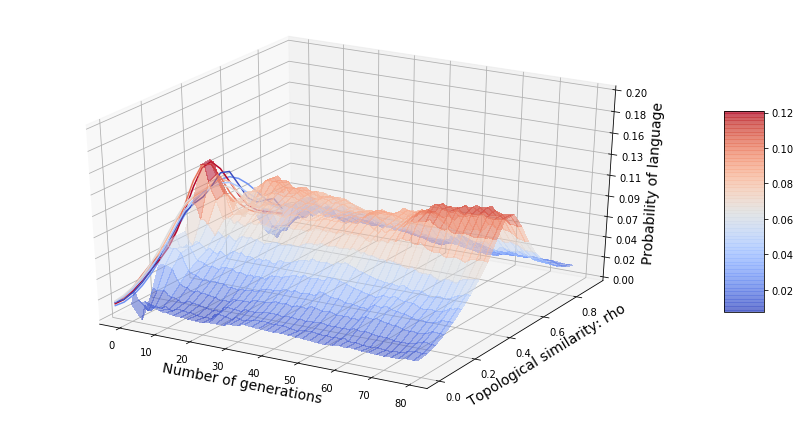

In [157]:
fig = plt.figure(figsize=(12,6))
ax = fig.gca(projection='3d')

Y = np.arange(0,80,1)
X_G, Y_G = np.meshgrid(X_NEW, Y)
Z = smoth_matrix
surf = ax.plot_surface(Y_G,X_G,Z,cmap=cm.coolwarm,linewidth=1,antialiased=False, alpha=0.5)
#cset = ax.contour(Y_G,X_G,Z,zdir='z',offset = 0, cmap=cm.coolwarm)
cset = ax.contour(Y_G,X_G,Z,zdir='x',offset = -5, cmap=cm.coolwarm)
ax.set_zlim(0,0.2)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

ax.set_xlabel('Number of generations',fontsize=14)
ax.set_ylabel('Topological similarity: rho',fontsize=14)
ax.set_zlabel('Probability of language',fontsize=14)

fig.colorbar(surf,shrink=0.5,aspect=5)
#ax.view_init(elev=90,azim=270)

fig.tight_layout()
fig.savefig('Figures/None_reset_3D.pdf')

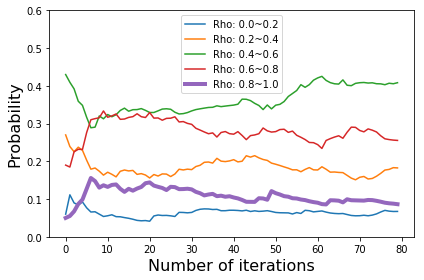

In [158]:
fig2 = plt.figure(figsize=(6,4))
ax2 = fig2.add_subplot(1,1,1)

BINS_2 = 5
histo_list2 = []
for comp_list in PDF_both_spk_and_lis:
    tmp_histo2 = np.histogram(comp_list, bins=BINS_2)[0]
    histo_list2.append(tmp_histo2)

histo_matrix2 = np.asarray(histo_list2)
smoth_matrix2 = smooth(histo_matrix2,20)

for i in range(smoth_matrix2.shape[0]):
    tmp_line = smoth_matrix2[i,:]
    tmp_line = tmp_line/tmp_line.sum()
    smoth_matrix2[i,:] = tmp_line

ax2.plot(smoth_matrix2[:,0],label='Rho: 0.0~0.2')
ax2.plot(smoth_matrix2[:,1],label='Rho: 0.2~0.4')
ax2.plot(smoth_matrix2[:,2],label='Rho: 0.4~0.6')
ax2.plot(smoth_matrix2[:,3],label='Rho: 0.6~0.8')
ax2.plot(smoth_matrix2[:,4],label='Rho: 0.8~1.0',linewidth=4)

plt.ylim(0,0.6)
plt.xlabel('Number of iterations',fontsize=16)
plt.ylabel('Probability',fontsize=16)

ax2.legend()
fig2.tight_layout()
fig2.savefig('Figures/None_reset_bins_distribution.pdf')
